# Exercicio

Vamos usar um famoso dataset sobre preços de casas em Boston (década de 70) para analisar alguns pontos.

O conjunto de dados contém informações relacionadas à habitação na área de Boston, Massachusetts. Isso inclui recursos relacionados à estrutura, vizinhança, acessibilidade e qualidade do ar. Grande parte dos dados foi coletada pelo Serviço de Recenseamento dos EUA em 1970, mas o conjunto completo de dados foi reunido para a publicação original: Harrison, D. e Rubinfeld, preços DL 'Hedonic e a demanda por ar limpo', J. Environ. Economics & Management, volume 5, 81-102, 1978.

Cada observação na nossa amostra é um setor censitario que tem entre 1000 e 8000 pessoas.

In [3]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

%matplotlib inline
boston = load_boston()

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [5]:
print(boston.data.shape)

(506, 13)


In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
bos = pd.DataFrame(boston.data)

In [9]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Guia.

(Aqui começamos a analisar dados! Portanto não há uma resposta certa ou errada, há apenas boas práticas, então abuse de pesquisar formas diferentes de se fazer a mesma atividade).

### 1. Preencha os nomes das colunas do dataset.

In [10]:
bos.columns = boston.feature_names

In [11]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 2. Crie uma coluna chamada "MEDV" com o "target".

In [12]:
bos['nova_variavel'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,nova_variavel
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 3. Análise as estatisticas descritivas de todas as variaveis numéricas. Há  campos nulos?

In [13]:
# há muitas formas de se fazer isso, comece com o dataframe.describe() e analise os números.

In [14]:
bos.describe().round(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,nova_variavel
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6,11.4,11.1,0.1,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6,23.3,6.9,0.3,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,0.1,0.0,5.2,0.0,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,7.0,17.0
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.2,5.0,330.0,19.0,391.4,11.4,21.2
75%,3.6,12.5,18.1,0.0,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


### 4. Exiba a matriz de variância x covariância das variaveis. Quais são as 3 variaveis mais correlacionadas com o preço dos imóveis? E as três menos correlacionadas? (tente não buscar no visual .. )

In [15]:
# a forma nao visual é essa: dataframe.corr().round(2) mas há muitos comandos mais intuitivos de viz.

In [16]:
# sns.pairplot(
#     data=bos,
#     vars=list(bos),
#     size=1,
#     plot_kws={'s': 5}
# );

In [17]:
# corr = bos.corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True

# with sns.axes_style("white"):
#     fig, ax = plt.subplots(figsize=(15, 12));
    
#     sns.heatmap(
#         corr,
#         ax=ax,
#         annot=True,
#         mask=mask,
#         square=True
#     );

### 5. Plot o histograma dos preços médios das casas e o histograma dos LOG dos preços médios das casas. A variável se parece mais com uma distribuição normal? (pode ser no visual).

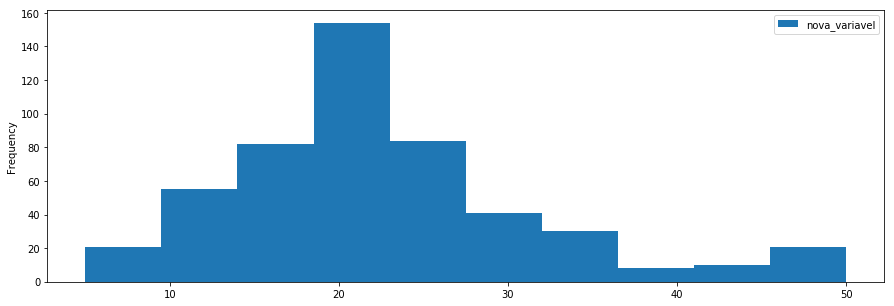

In [19]:
bos[['nova_variavel']].plot(
    kind='hist',
    figsize=(15, 5),
    bins=10
);

In [8]:
# np.log(bos[['MEDV']]).plot(
#     kind='hist',
#     figsize=(15, 5),
#     bins=10
# );

### 6. Rode uma regressão simples entre a preços médios do condado e as Idades médias desses imóveis.

    a) Qual o valor do nosso beta e o que ele significa?
    b) Esse parâmetro estimado é estatisticamente significativo? Qual a probabilidade dele ser diferente de zero?
    c) Podemos dizer que o o beta estimado (para idade) representa um efeito causal nos preços médios? Explique.
    d) Agora rode a mesma regressão com log no preço médio e interprete a diferença dos resultados (betas e R^2) porque se alterou?

In [21]:
def run_regression(df,function):
    model = smf.ols(function, df).fit()
    print(model.summary())

In [22]:
run_regression(bos,'''nova_variavel ~ AGE''')

                            OLS Regression Results                            
Dep. Variable:          nova_variavel   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Tue, 21 Aug 2018   Prob (F-statistic):           1.57e-18
Time:                        19:40:05   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.0

In [11]:
# run_regression(bos,'''np.log(MEDV) ~ AGE''')

### 7. Quanto morar próximo ao Rio Charles impacta nos preços médios dos imóveis?

In [23]:
bos.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [64]:
run_regression(bos,'''MEDV ~ CHAS''')

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.39e-05
Time:                        11:59:04   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0938      0.418     52.902      0.0

### 8. Rode agora uma nova regressão com todas as variáveis disponiveis.

    a) Porque o beta estimado para idade média se alterou? Análise os porquês dele ter perdido significância estatística.
    b) Explique porque o beta estimado para o Rio Charles se alterou.
    c) Qual o impacto da poluição nos preços dos imóveis?
    d) Podemos afirmar que os efeitos estimados são causais? Porque?
    e) Tem algum sinal dos parâmetros que não faz sentido? Explique.
    f) Qual a interpretação do intercepto nessa regressão.

In [26]:
run_regression(bos,'''nova_variavel ~ CRIM +
ZN +
INDUS +
CHAS +
NOX +
RM +
AGE +
DIS +
RAD +
TAX +
PTRATIO +
B +
LSTAT''')

                            OLS Regression Results                            
Dep. Variable:          nova_variavel   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 21 Aug 2018   Prob (F-statistic):          6.95e-135
Time:                        19:57:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

# Desafio

1) Rode uma regressão em que seus parâmetros estimados expliquem mais do que 80% da variância dos preços médios. 

2) Se você fosse um negociante de imóveis e tivesse que comprar 5 imóveis visando a melhor rentabilidade percentual (retorno sobre o investimento), quais 5 imóveis do nosso dataset você apostaria? Porque? (dica do professor: Residuos) 

- Update: Considere que você deve escolher um condado (que há milhares de imóveis) ao invés de um imóvel já que o agrupamento dos dados é por condado.